In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:\\Sirisha\\End_to_End_ML\\notebooks\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.0 KB


In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
## The dataset contains 122 records for the first region and 122 records for the second region. We can create a new column 'Region' to indicate the region for each record.

df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [6]:
df['Region']=df['Region'].astype(int)

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [9]:
df=df.dropna().reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          244 non-null    str  
 1   month        244 non-null    str  
 2   year         244 non-null    str  
 3   Temperature  244 non-null    str  
 4    RH          244 non-null    str  
 5    Ws          244 non-null    str  
 6   Rain         244 non-null    str  
 7   FFMC         244 non-null    str  
 8   DMC          244 non-null    str  
 9   DC           244 non-null    str  
 10  ISI          244 non-null    str  
 11  BUI          244 non-null    str  
 12  FWI          244 non-null    str  
 13  Classes      244 non-null    str  
 14  Region       244 non-null    int64
dtypes: int64(1), str(14)
memory usage: 28.7 KB


In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.index[122]

122

In [13]:

df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [14]:
df.drop(df.index[122],inplace=True)

In [15]:
df.iloc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 123, dtype: object

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df=df.reset_index(drop=True)

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='str')

In [19]:
## fix spaces in column names
df.columns =df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          243 non-null    int64
 1   month        243 non-null    int64
 2   year         243 non-null    int64
 3   Temperature  243 non-null    int64
 4   RH           243 non-null    int64
 5   Ws           243 non-null    int64
 6   Rain         243 non-null    str  
 7   FFMC         243 non-null    str  
 8   DMC          243 non-null    str  
 9   DC           243 non-null    str  
 10  ISI          243 non-null    str  
 11  BUI          243 non-null    str  
 12  FWI          243 non-null    str  
 13  Classes      243 non-null    str  
 14  Region       243 non-null    int64
dtypes: int64(7), str(8)
memory usage: 28.6 KB


In [21]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    str    
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), str(1)
memory usage: 28.6 KB


In [22]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

<StringArray>
['not fire', 'fire']
Length: 2, dtype: str

In [23]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)
df['Classes'].unique()

array([0, 1])

In [87]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [25]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [26]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


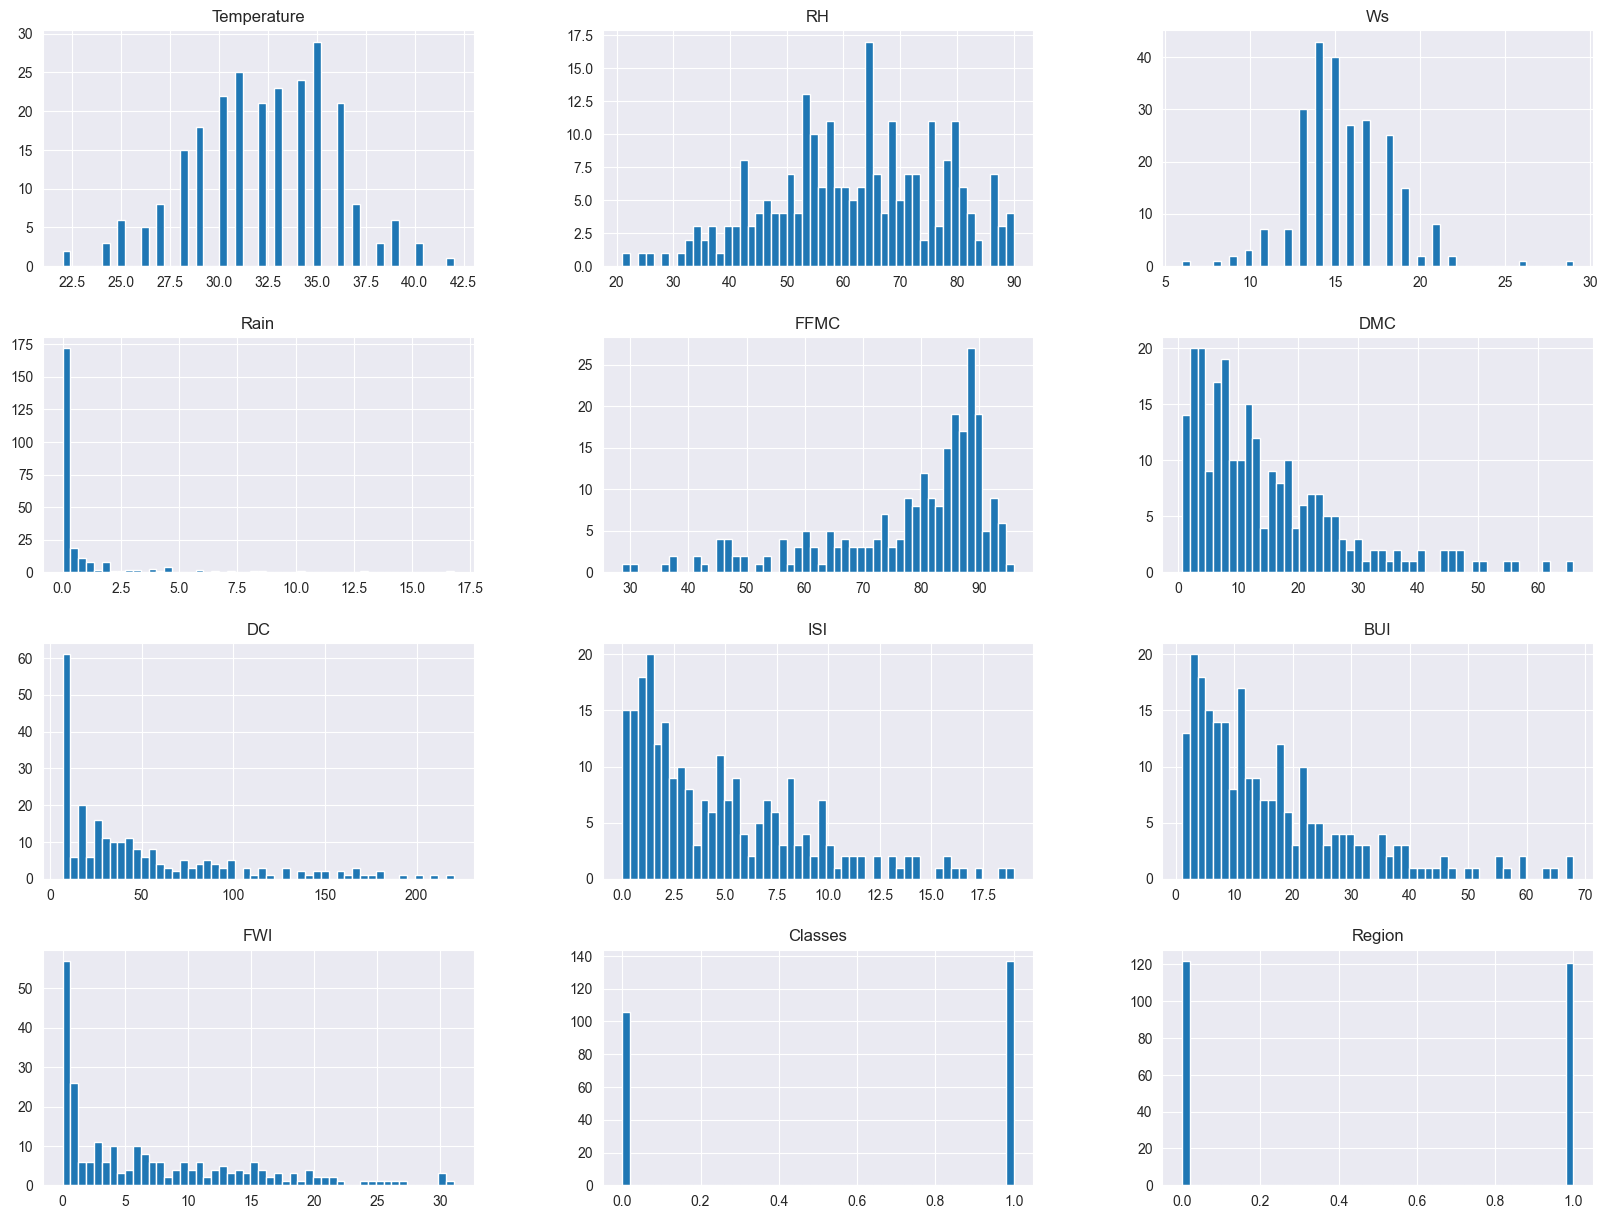

In [27]:
## Visualizations
sns.set_style("darkgrid")
df.hist(bins=50,figsize=(20,15))
plt.show()

In [28]:
##Percentage for pie Chart
percentage=df['Classes'].value_counts(normalize=True)*100

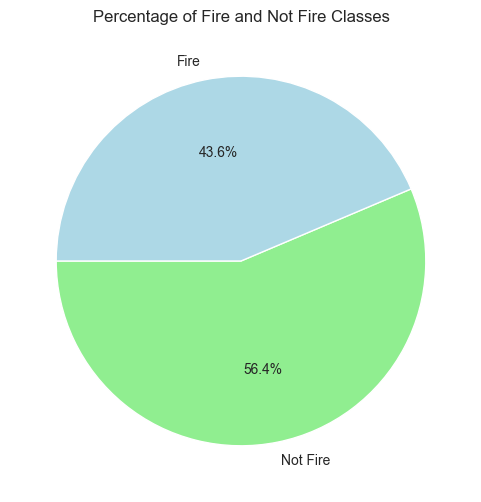

In [29]:
## Plotting a pie chart for percentage of fire and not fire classes
plt.figure(figsize=(6,6))
plt.pie(percentage,labels=['Not Fire','Fire'],autopct='%1.1f%%',startangle=180,colors=['lightgreen','lightblue'])
plt.title('Percentage of Fire and Not Fire Classes')
plt.show()

In [30]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

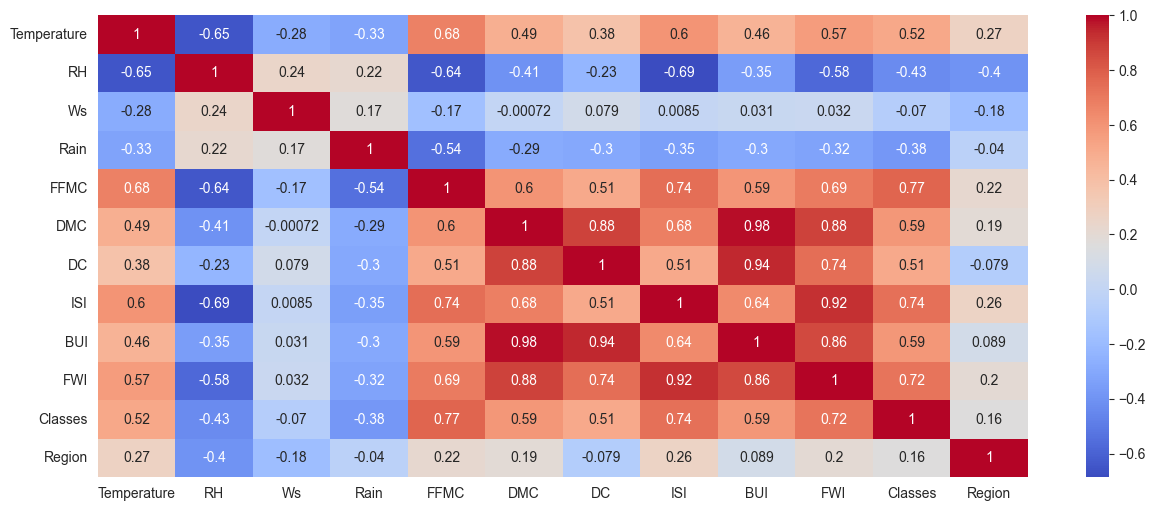

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: ylabel='FWI'>

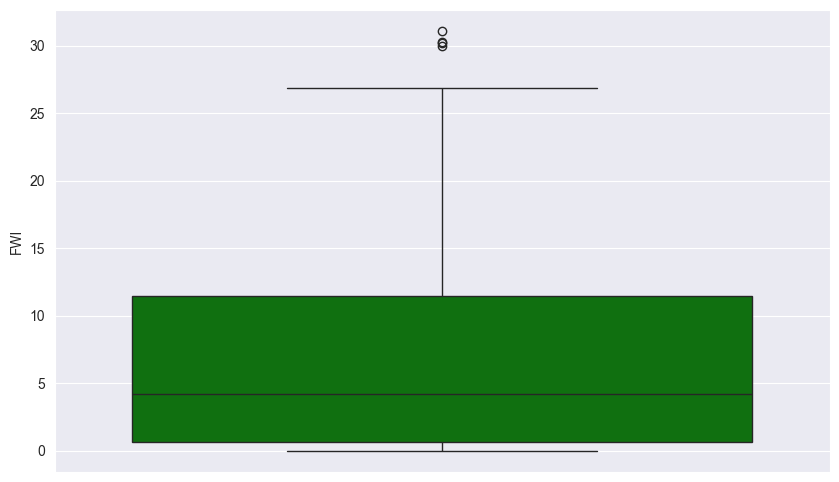

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(df['FWI'],color='green')

In [33]:
## Independent and dependent variables

X=df.drop('FWI',axis=1)
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [34]:
y=df['FWI']
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [35]:
##Train and test split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(182, 11) (61, 11) (182,) (61,)


In [36]:
def correlation_mat(data,threshold):
    col_corr=set()
    corr_mat=data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features=correlation_mat(X_train,0.85)
print(corr_features)


{'BUI', 'DC'}


In [37]:
## drop highly correlated features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [38]:
## standardization of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

<Axes: title={'center': 'After Scaling'}>

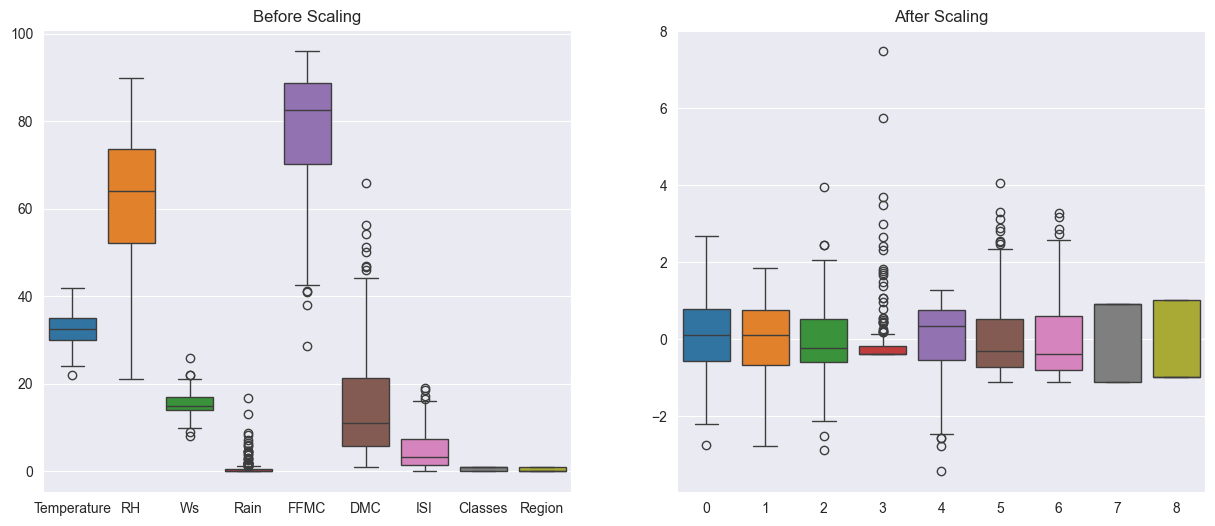

In [39]:
## Box plots to understand the effect of standardization
plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.boxplot(X_train)
plt.subplot(1,2,2)
plt.title('After Scaling')
sns.boxplot(X_train_Scaled)


In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso , ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lm=LinearRegression()
lm.fit(X_train_Scaled,y_train)
y_lm_pred=lm.predict(X_test_Scaled)
print('Linear Regression:')
print('-----------------------')
print('The R2 Score is :',r2_score(y_test,y_lm_pred))
print('The MAE is :',mean_absolute_error(y_test,y_lm_pred))
print('The MSE is :',mean_squared_error(y_test,y_lm_pred))


rm=Ridge()
rm.fit(X_train_Scaled,y_train)

y_rm_pred=rm.predict(X_test_Scaled)
print('Ridge Regression:')
print('-----------------------')
print('The R2 Score is :',r2_score(y_test,y_rm_pred))
print('The MAE is :',mean_absolute_error(y_test,y_rm_pred))
print('The MSE is :',mean_squared_error(y_test,y_rm_pred))



model=Lasso()
model.fit(X_train_Scaled,y_train)
y_lasso_pred=model.predict(X_test_Scaled)
print('Lasso Regression:')
print('-----------------------')
print('The R2 Score is :',r2_score(y_test,y_lasso_pred))
print('The MAE is :',mean_absolute_error(y_test,y_lasso_pred))
print('The MSE is :',mean_squared_error(y_test,y_lasso_pred))



en=ElasticNet()
en.fit(X_train_Scaled,y_train)
y_en_pred=en.predict(X_test_Scaled)
print('ElasticNet Regression:')
print('-----------------------')
print('The R2 Score is :',r2_score(y_test,y_en_pred))
print('The MAE is :',mean_absolute_error(y_test,y_en_pred))
print('The MSE is :',mean_squared_error(y_test,y_en_pred))


Linear Regression:
-----------------------
The R2 Score is : 0.9847657384266951
The MAE is : 0.5468236465249978
The MSE is : 0.674276687379158
Ridge Regression:
-----------------------
The R2 Score is : 0.9842993364555512
The MAE is : 0.5642305340105715
The MSE is : 0.6949198918152096
Lasso Regression:
-----------------------
The R2 Score is : 0.9492020263112388
The MAE is : 1.1331759949144087
The MSE is : 2.248345891897476
ElasticNet Regression:
-----------------------
The R2 Score is : 0.8753460589519703
The MAE is : 1.8822353634895999
The MSE is : 5.517251101025223


## Lasso Crossvalidation


In [42]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)
y_cv_pred =lassocv.predict(X_test_Scaled)

print('Lasso CV Regression:')
print('-----------------------')
print('The R2 Score is :',r2_score(y_test,y_cv_pred))
print('The MAE is :',mean_absolute_error(y_test,y_cv_pred))
print('The MSE is :',mean_squared_error(y_test,y_cv_pred))

Lasso CV Regression:
-----------------------
The R2 Score is : 0.9814406737205228
The MAE is : 0.6358894638564663
The MSE is : 0.8214458563350046


In [43]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('model.pkl','wb') as f:
    pickle.dump(rm,f)